### Load Data

In [8]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [10]:
X = iris.data
y = iris.target

In [11]:
#X

In [12]:
X.shape

(150, 4)

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Visualize Data

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Lets create a 3D Graph

C:\Users\milan\AppData\Local\Temp/ipykernel_4440/2226713437.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


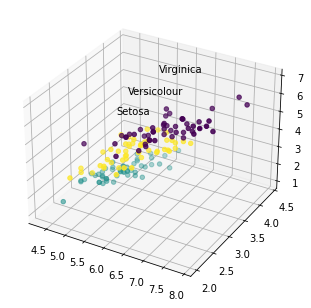

In [16]:
fig = plt.figure()
ax = Axes3D(fig)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean()-1.5,
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name)
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

#plt.show()

### Using PCA

In [17]:
from sklearn.decomposition import PCA

PCA with 2 components

In [18]:
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

Get new dimensions

In [19]:
X_pca = pca.transform(X)
#X_pca

In [20]:
X_pca.shape

(150, 2)

Plotting Iris data using 2 PCs

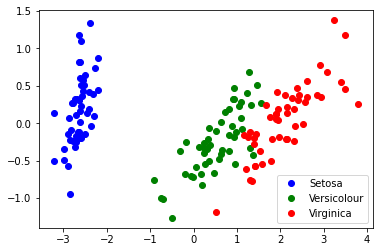

In [21]:
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

### Exploring PCA 

Check EigenVectors or PC 1/2

In [22]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [23]:
#Explained variance represents the information explained using a particular 
#principal components (eigenvectors)
# Explained variance is calculated as ratio of eigenvalue of a articular principal component 
# (eigenvector) with total eigenvalues
pca.explained_variance_  #The amount of variance explained by each of the selected components

array([4.22824171, 0.24267075])

In [24]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
import numpy as np

def PCA(X , num_components):
    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    return X_reduced

In [26]:
import pandas as pd

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [27]:
principal_df

PC1       PC2          target
0    2.684207  0.326607     Iris-setosa
1    2.715391 -0.169557     Iris-setosa
2    2.889820 -0.137346     Iris-setosa
3    2.746437 -0.311124     Iris-setosa
4    2.728593  0.333925     Iris-setosa
..        ...       ...             ...
145 -1.944017  0.187415  Iris-virginica
146 -1.525664 -0.375021  Iris-virginica
147 -1.764046  0.078519  Iris-virginica
148 -1.901629  0.115877  Iris-virginica
149 -1.389666 -0.282887  Iris-virginica

[150 rows x 3 columns]